# Clustering and Segmentation for Banking

## Project Title: Exploratory Analysis and Advanced Clustering Techniques for Customer Segmentation in Banking


## IMPORTING LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
creditcard_df = pd.read_csv("bank_data.csv")

In [3]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
creditcard_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 1. Data Analysis

### 1.1 Minimum and Maximum amount in `Balance` Attribute

In [5]:
max = creditcard_df['BALANCE'].max()
min = creditcard_df['BALANCE'].min()
mean = creditcard_df['BALANCE'].mean()
print("Max = ",max)
print("Min = ",min)
print("Mean = ",mean)

Max =  19043.13856
Min =  0.0
Mean =  1564.4748276781038


In [6]:
creditcard_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [9]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

### 1.2 VISUALIZING AND EXPLORING THE DATASET

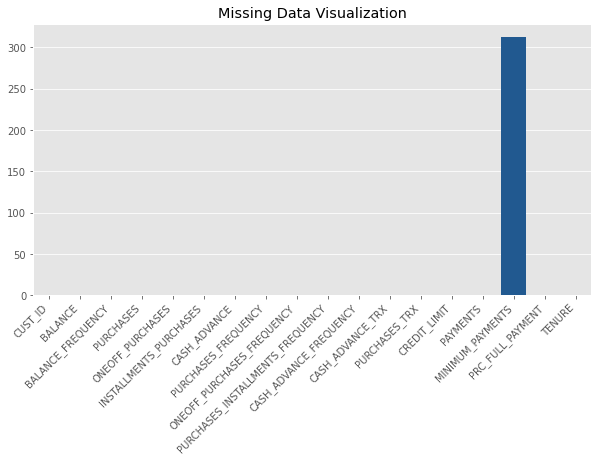

In [10]:
# Plotting missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=creditcard_df.columns, y=creditcard_df.isnull().sum(), palette='Blues')
plt.xticks(rotation=45, ha='right')
plt.title('Missing Data Visualization')
plt.show()

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### 1.2.1 Minimum Payments

In [12]:
# Rows where "Minimum Payments" is null
creditcard_df[creditcard_df['MINIMUM_PAYMENTS'].isnull() == True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


#### 1.2.2 Credit Limit

In [13]:
## Replacing "Credit Limit" With Mean value
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [14]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Check for outliers:
Using IQR, we can follow the below approach to find outliers:

Calculate the first and third quartile (Q1 and Q3).<br>
Further, evaluate the interquartile range, IQR = Q3-Q1. <br>
Estimate the lower bound, the lower bound = Q1*1.5 <br>
Estimate the upper bound, upper bound = Q3*1.5 <br>
The data points that lie outside of the lower and the upper bound are outliers. <br>

In [15]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [16]:
non_categorical_data = creditcard_df.drop(['CUST_ID'], axis=1)
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = round(outlier_percent(data), 2)
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


### Removing Outliers
Let's get rid of the noise. First set all outliers as NaN, so it will be taken care of in the next stage, where I impute the missing values.

In [17]:
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) | (data > maximum))
    non_categorical_data[column].loc[outliers] = np.nan
    
non_categorical_data.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

### Imputing the missing data - KNN Imputer
I use KNN imputer: Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [18]:
# imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Duplicates values

In [19]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

## 2. Data Visualization -

We will visualise the data, to find hidden patterns or trends.

### 2.1 Distplot

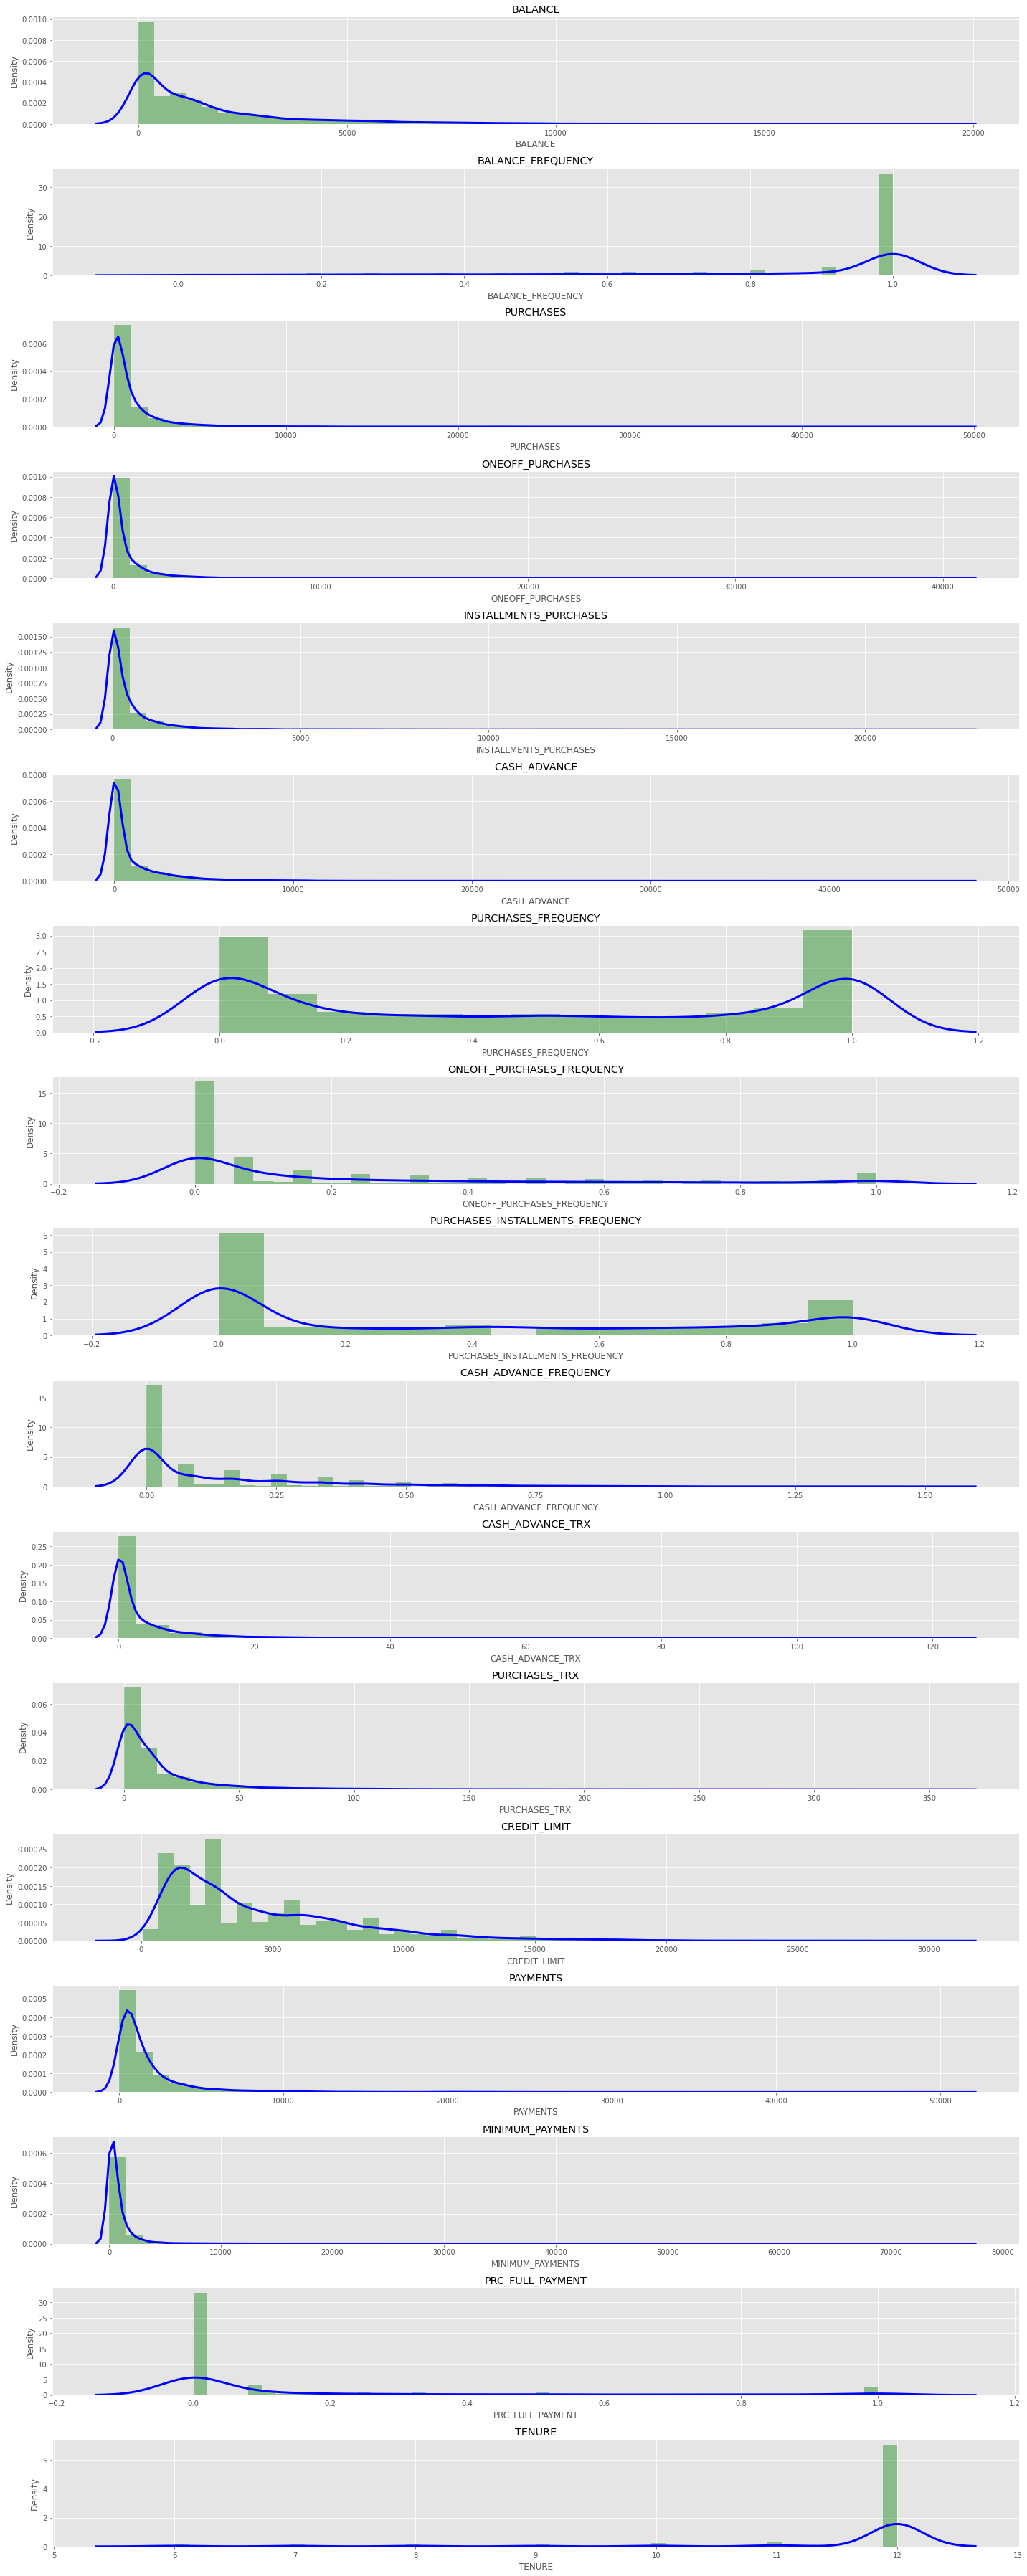

In [20]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Exclude 'CUST_ID' from visualization
columns_to_visualize = [col for col in creditcard_df.columns if col != 'CUST_ID']

plt.figure(figsize=(20, 50))
for i, column in enumerate(columns_to_visualize):
    plt.subplot(17, 1, i + 1)
    displot = sns.distplot(creditcard_df[column], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(column)

plt.tight_layout()
plt.show()

#### Insights

1. Mean of balance is 1500 dollors
2. 'Balance_Frequency' for most customers is updated frequently ~1
3. For 'PURCHASES_FREQUENCY', there are two distinct group of customers
4. For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
5. Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
6. Credit limit average is around $4500
7. Most customers are ~11 years tenure

### 2.2 Heatmap - For Correlation Analysis

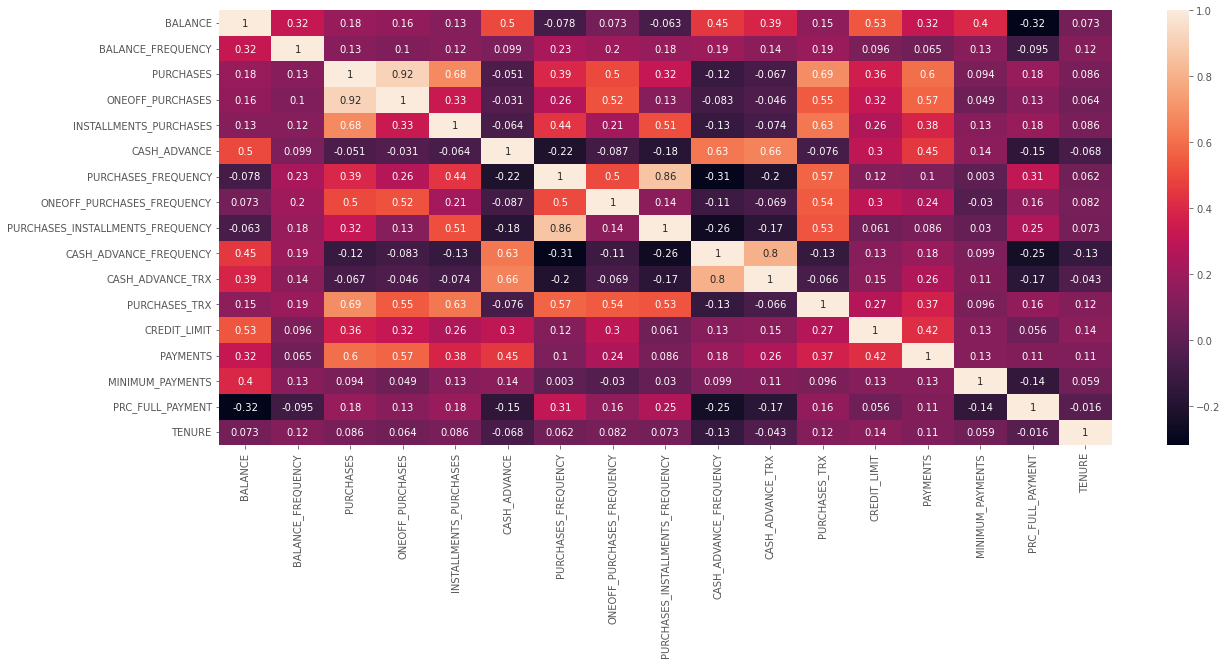

In [21]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20, 8))
heatmap = sns.heatmap(correlations, annot = True)
plt.show()

#### Insights

1. 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
2. Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

### 3. FEATURE ENGINEERING

In [22]:
creditcard_df["new_BALANCE_BALANCE_FREQUENCY"] = creditcard_df["BALANCE"] * creditcard_df["BALANCE_FREQUENCY"]
creditcard_df["new_ONEOFF_PURCHASES_PURCHASES"] = creditcard_df["ONEOFF_PURCHASES"] / creditcard_df["PURCHASES"]
creditcard_df["new_INSTALLMENTS_PURCHASES_PURCHASES"] = creditcard_df["INSTALLMENTS_PURCHASES"] / creditcard_df["PURCHASES"]
creditcard_df["new_CASH_ADVANCE_PURCHASES_PURCHASES"] = creditcard_df["CASH_ADVANCE"] * creditcard_df["CASH_ADVANCE_FREQUENCY"]
creditcard_df["new_PURCHASES_PURCHASES_FREQUENCY"] = creditcard_df["PURCHASES"] * creditcard_df["PURCHASES_FREQUENCY"]
creditcard_df["new_PURCHASES_ONEOFF_PURCHASES_FREQUENCY"] = creditcard_df["PURCHASES"] * creditcard_df["ONEOFF_PURCHASES_FREQUENCY"]
creditcard_df["new_PURCHASES_PURCHASES_TRX"] = creditcard_df["PURCHASES"] / creditcard_df["PURCHASES_TRX"]
creditcard_df["new_CASH_ADVANCE_CASH_ADVANCE_TRX"] = creditcard_df["CASH_ADVANCE"] / creditcard_df["CASH_ADVANCE_TRX"]
creditcard_df["new_BALANCE_CREDIT_LIMIT"] = creditcard_df["BALANCE"] / creditcard_df["CREDIT_LIMIT"]
creditcard_df["new_PAYMENTS_CREDIT_LIMIT"] = creditcard_df["PAYMENTS"] / creditcard_df["MINIMUM_PAYMENTS"]

In [23]:
# Checking missing variable
creditcard_df.isnull().sum().sort_values(ascending=False).head()

new_CASH_ADVANCE_CASH_ADVANCE_TRX       4628
new_ONEOFF_PURCHASES_PURCHASES          2044
new_INSTALLMENTS_PURCHASES_PURCHASES    2042
new_PURCHASES_PURCHASES_TRX             2041
new_PAYMENTS_CREDIT_LIMIT                313
dtype: int64

In [24]:
creditcard_df.fillna(0, inplace=True)

In [25]:
#Indexing CUST_ID feature
creditcard_df.set_index('CUST_ID', inplace=True)
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,new_BALANCE_BALANCE_FREQUENCY,new_ONEOFF_PURCHASES_PURCHASES,new_INSTALLMENTS_PURCHASES_PURCHASES,new_CASH_ADVANCE_PURCHASES_PURCHASES,new_PURCHASES_PURCHASES_FREQUENCY,new_PURCHASES_ONEOFF_PURCHASES_FREQUENCY,new_PURCHASES_PURCHASES_TRX,new_CASH_ADVANCE_CASH_ADVANCE_TRX,new_BALANCE_CREDIT_LIMIT,new_PAYMENTS_CREDIT_LIMIT
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,33.464257,0.0,1.0,0.000000,15.900032,0.000000,47.700000,0.000000,0.040901,1.446508
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,2911.334306,0.0,0.0,1610.736371,0.000000,0.000000,0.000000,1610.736371,0.457495,3.826241
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,2495.148862,1.0,0.0,0.000000,773.170000,773.170000,64.430833,0.000000,0.332687,0.991682
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1060.609133,1.0,0.0,17.148933,124.916167,124.916167,1499.000000,205.788017,0.222223,0.000000
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,817.714335,1.0,0.0,0.000000,1.333328,1.333328,16.000000,0.000000,0.681429,2.771075


In [26]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in creditcard_df.columns:
    replace_with_thresholds(creditcard_df, col)

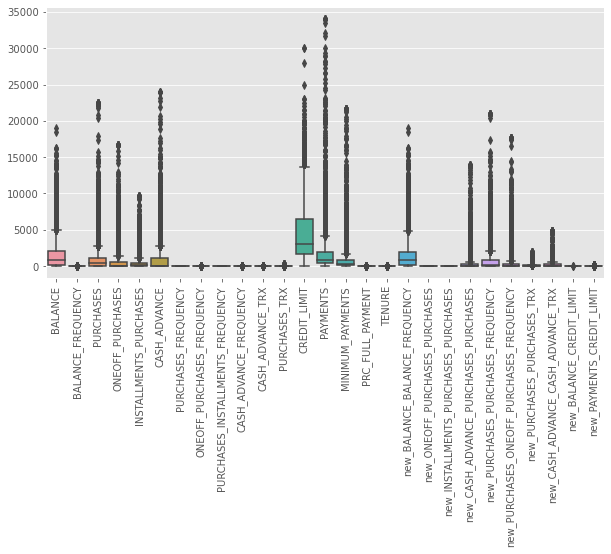

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=creditcard_df)
plt.xticks(rotation=90)
plt.show()

In [28]:
# Min Max Scaler
names = creditcard_df.columns
indexes = creditcard_df.index
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(creditcard_df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,new_BALANCE_BALANCE_FREQUENCY,new_ONEOFF_PURCHASES_PURCHASES,new_INSTALLMENTS_PURCHASES_PURCHASES,new_CASH_ADVANCE_PURCHASES_PURCHASES,new_PURCHASES_PURCHASES_FREQUENCY,new_PURCHASES_ONEOFF_PURCHASES_FREQUENCY,new_PURCHASES_PURCHASES_TRX,new_CASH_ADVANCE_CASH_ADVANCE_TRX,new_BALANCE_CREDIT_LIMIT,new_PAYMENTS_CREDIT_LIMIT
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,0.002148,0.818182,0.004251,0.000000,0.009819,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.001757,0.000000,0.4,0.000000,0.000759,0.000000,0.024255,0.000000,0.015477,0.011723
C10002,0.168169,0.909091,0.000000,0.000000,0.000000,0.268787,0.000000,0.000000,0.000000,0.166667,...,0.152881,0.000000,0.0,0.115958,0.000000,0.000000,0.000000,0.337471,0.173123,0.031008
C10003,0.131026,1.000000,0.034450,0.046229,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.131026,0.554418,0.0,0.000000,0.036899,0.043891,0.032763,0.000000,0.125893,0.008037
C10004,0.087521,0.636364,0.066791,0.089628,0.000000,0.008585,0.083333,0.083333,0.000000,0.055555,...,0.055695,0.554418,0.0,0.001235,0.005961,0.007091,0.762236,0.043115,0.084092,0.000000
C10005,0.042940,1.000000,0.000713,0.000957,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.042940,0.554418,0.0,0.000000,0.000064,0.000076,0.008136,0.000000,0.257863,0.022457


### 4. FEATURE SELECTION

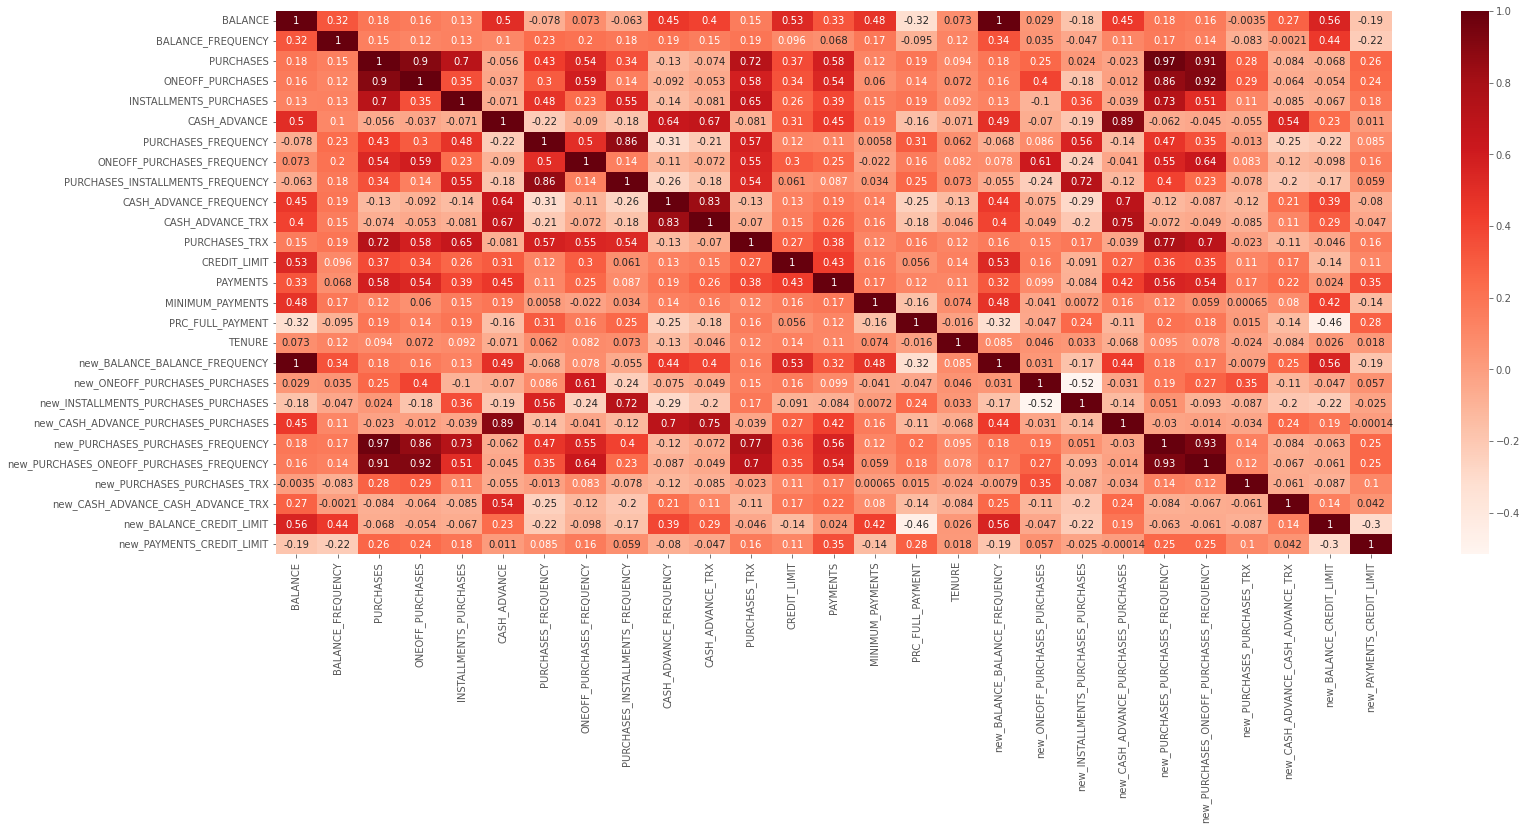

In [29]:
#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [30]:
#Correlation with BALANCE variable
cor_target = abs(cor["BALANCE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

BALANCE                          1.000000
CASH_ADVANCE                     0.504225
CREDIT_LIMIT                     0.531267
new_BALANCE_BALANCE_FREQUENCY    0.998279
new_BALANCE_CREDIT_LIMIT         0.555446
Name: BALANCE, dtype: float64

In [31]:
cor_target

BALANCE                                     1.000000
BALANCE_FREQUENCY                           0.322412
PURCHASES                                   0.182810
ONEOFF_PURCHASES                            0.164310
INSTALLMENTS_PURCHASES                      0.125089
CASH_ADVANCE                                0.504225
PURCHASES_FREQUENCY                         0.077944
ONEOFF_PURCHASES_FREQUENCY                  0.073166
PURCHASES_INSTALLMENTS_FREQUENCY            0.063186
CASH_ADVANCE_FREQUENCY                      0.449218
CASH_ADVANCE_TRX                            0.401714
PURCHASES_TRX                               0.153971
CREDIT_LIMIT                                0.531267
PAYMENTS                                    0.326237
MINIMUM_PAYMENTS                            0.477509
PRC_FULL_PAYMENT                            0.318959
TENURE                                      0.072692
new_BALANCE_BALANCE_FREQUENCY               0.998279
new_ONEOFF_PURCHASES_PURCHASES              0.

#### Lasso CV Feature Importances

In [32]:
X = data_scaled.drop(["BALANCE","new_BALANCE_BALANCE_FREQUENCY", "new_BALANCE_CREDIT_LIMIT", "BALANCE_FREQUENCY"],1)   #Feature Matrix
y = data_scaled["BALANCE"]          #Target Variable

reg = LassoCV()
reg.fit(X, y)

LassoCV()

In [33]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000014
Best score using built-in LassoCV: 0.643861


In [34]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 19 variables and eliminated the other 4 variables


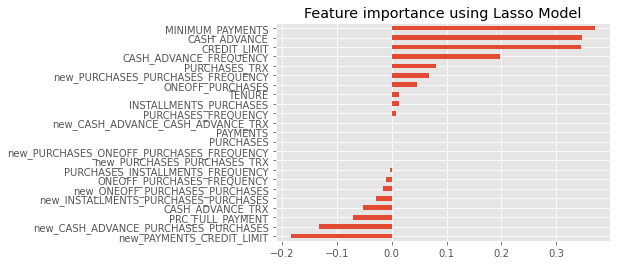

In [35]:
imp_coef = coef.sort_values()
lasso_FE = imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

## 5. Applying `Hierarchial` Clustering

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [63]:
raw_df=pd.read_csv("bank_data.csv")
raw_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [64]:
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [65]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827


**Dendograms** are used to divide a given cluster into many different clusters.

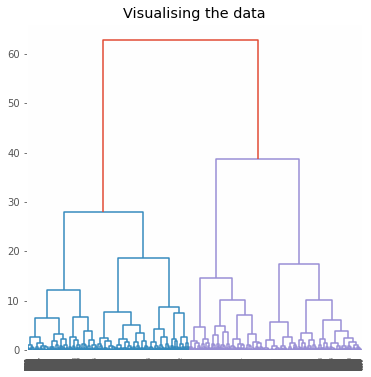

In [66]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

Determine the optimal number of clusters using **Silhouette Score.**

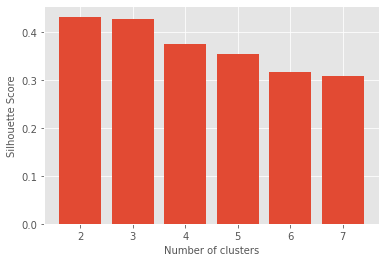

In [67]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, 
                         AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Building and Visualizing Clustering Model for k = 3

In [68]:
agg = AgglomerativeClustering(n_clusters = 3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

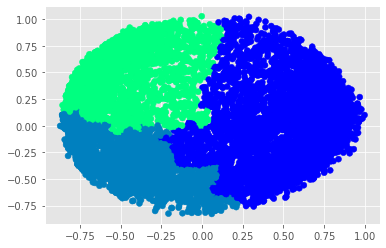

In [69]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## 6. Understanding and Applying PCA

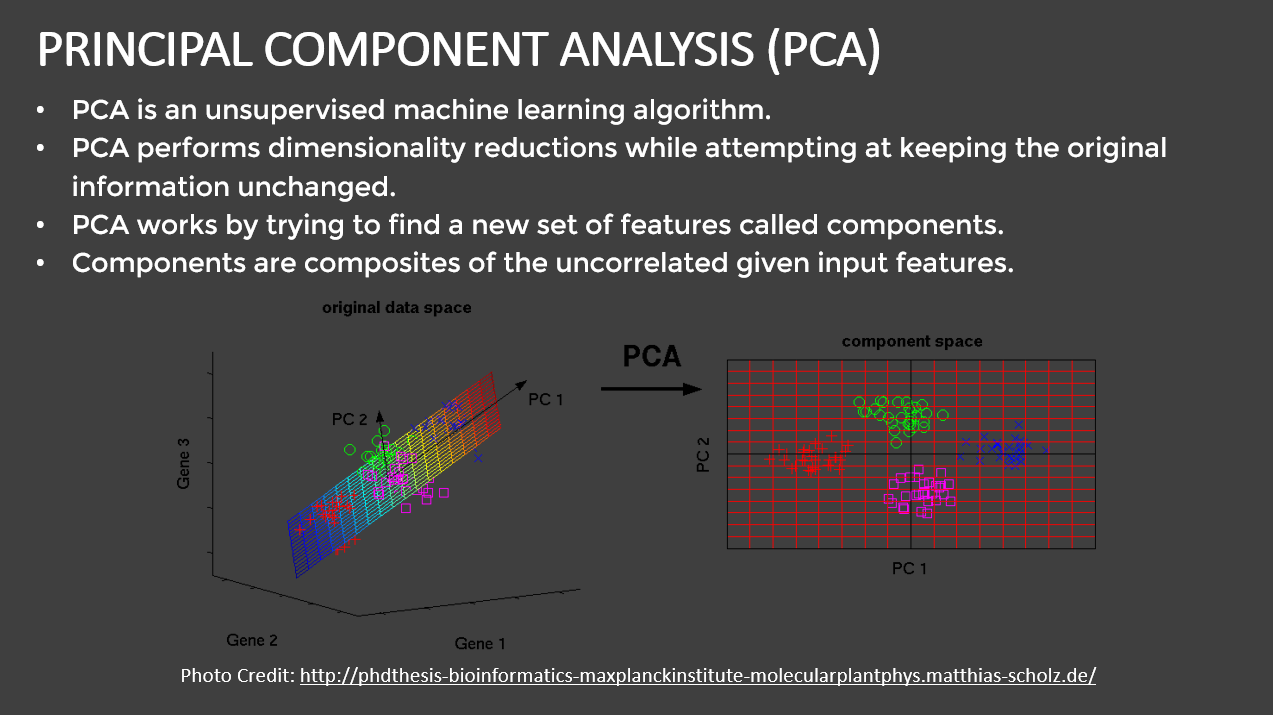

In [56]:
# Obtain the principal components 

pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(data_scaled)
principal_comp

array([[-0.42015941, -0.30302119],
       [-0.65064949, -0.11865498],
       [ 0.25378262,  0.95280992],
       ...,
       [ 0.39972721, -0.48694881],
       [-0.65172187, -0.24254634],
       [-0.12263457,  0.57377493]])

In [57]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.420159,-0.303021
1,-0.650649,-0.118655
2,0.253783,0.952810
3,-0.599153,0.233670
4,-0.581471,0.210354


In [58]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.420159,-0.303021,3
1,-0.650649,-0.118655,2
2,0.253783,0.952810,0
3,-0.599153,0.233670,1
4,-0.581471,0.210354,1


## pca_df.shape

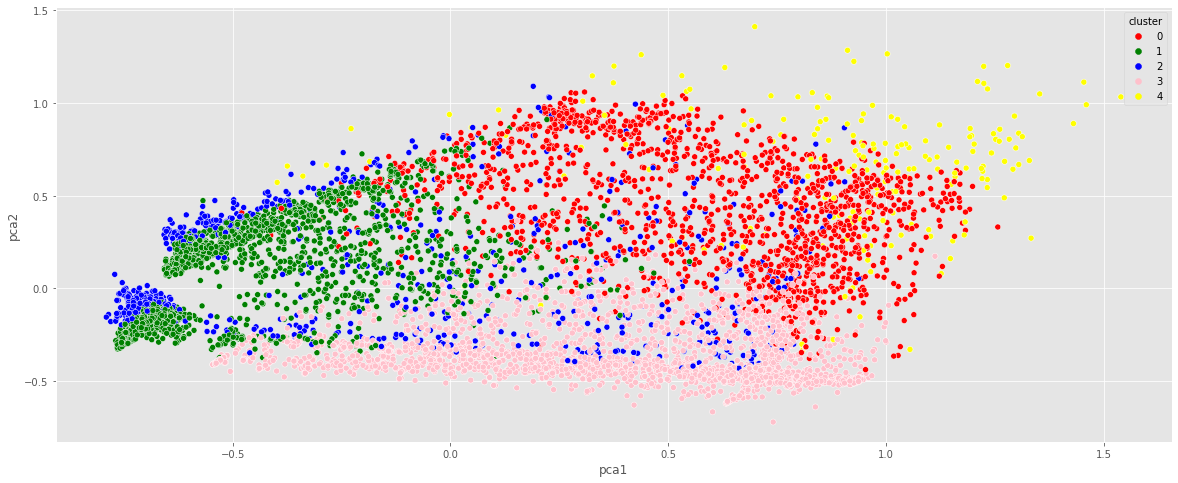

In [60]:
plt.figure(figsize=(20,8))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow'])
plt.show()